# Tree Methods Consulting Project 

You've been hired by a dog food company to try to predict why some batches of their dog food are spoiling much quicker than intended! Unfortunately this Dog Food company hasn't upgraded to the latest machinery, meaning that the amounts of the five preservative chemicals they are using can vary a lot, but which is the chemical that has the strongest effect? The dog food company first mixes up a batch of preservative that contains 4 different preservative chemicals (A,B,C,D) and then is completed with a "filler" chemical. The food scientists beelive one of the A,B,C, or D preservatives is causing the problem, but need your help to figure out which one!
Use Machine Learning with RF to find out which parameter had the most predicitive power, thus finding out which chemical causes the early spoiling! So create a model and then find out how you can decide which chemical is the problem!

* Pres_A : Percentage of preservative A in the mix
* Pres_B : Percentage of preservative B in the mix
* Pres_C : Percentage of preservative C in the mix
* Pres_D : Percentage of preservative D in the mix
* Spoiled: Label indicating whether or not the dog food batch was spoiled.
___

**Think carefully about what this problem is really asking you to solve. While we will use Machine Learning to solve this, it won't be with your typical train/test split workflow. If this confuses you, skip ahead to the solution code along walk-through!**
____

## EDA with pandas and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('viridis')

In [2]:
eda = pd.read_csv('../datasets/dog_food.csv')
eda.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0


In [3]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A        490 non-null    int64  
 1   B        490 non-null    int64  
 2   C        490 non-null    float64
 3   D        490 non-null    int64  
 4   Spoiled  490 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 19.3 KB


In [4]:
eda.isna().sum()

A          0
B          0
C          0
D          0
Spoiled    0
dtype: int64

In [5]:
eda.describe()

,A,B,C,D,Spoiled
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,5.534694,5.504082,9.126531,5.579592,0.285714
std,2.951520,2.853797,2.055545,2.854837,0.452216
min,1.000000,1.000000,5.000000,1.000000,0.000000
25%,3.000000,3.000000,8.000000,3.000000,0.000000
50%,5.000000,6.000000,9.000000,6.000000,0.000000
75%,8.000000,8.000000,11.000000,8.000000,1.000000
max,10.000000,10.000000,14.000000,10.000000,1.000000


In [8]:
eda['A'].nunique(), eda['B'].nunique(), eda['C'].nunique(), eda['D'].nunique()

(10, 10, 10, 10)

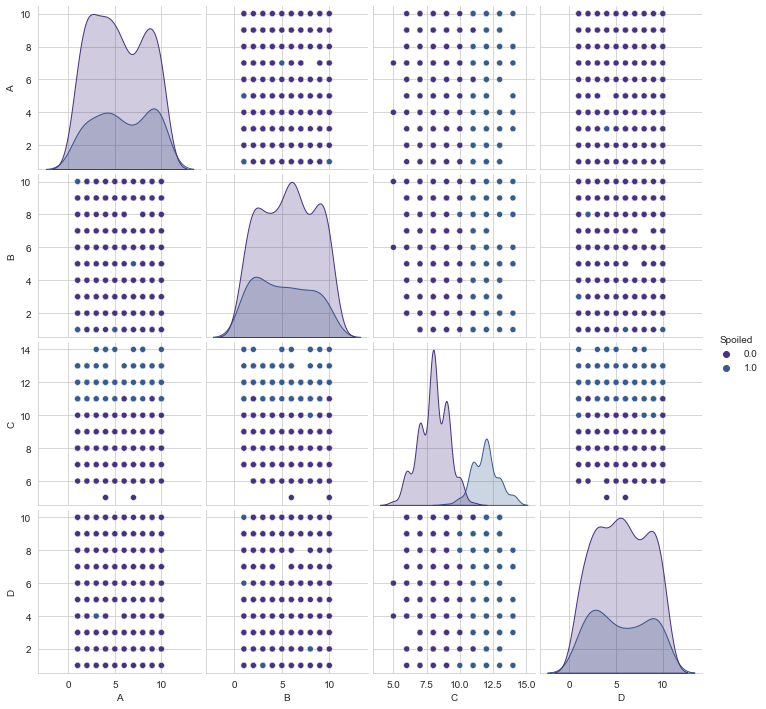

In [12]:
sns.pairplot(eda, hue='Spoiled')

<AxesSubplot:xlabel='Spoiled', ylabel='count'>

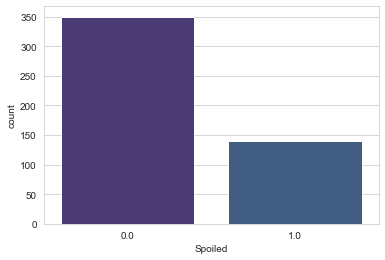

In [13]:
sns.countplot(x='Spoiled', data=eda)

<AxesSubplot:xlabel='A', ylabel='count'>

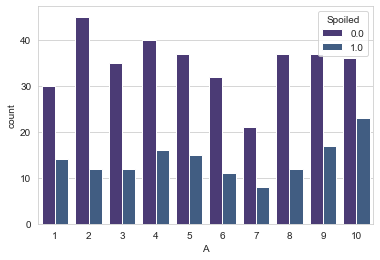

In [16]:
sns.countplot(x='A', data=eda, hue='Spoiled')

<AxesSubplot:xlabel='B', ylabel='count'>

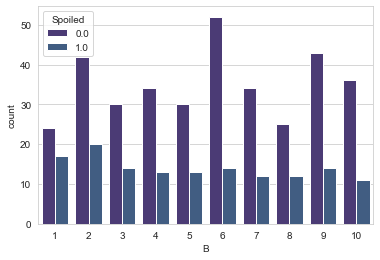

In [17]:
sns.countplot(x='B', data=eda, hue='Spoiled')

<AxesSubplot:xlabel='C', ylabel='count'>

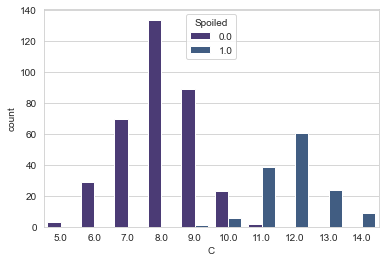

In [18]:
sns.countplot(x='C', data=eda, hue='Spoiled')

<AxesSubplot:xlabel='D', ylabel='count'>

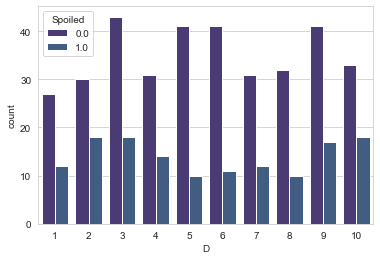

In [19]:
sns.countplot(x='D', data=eda, hue='Spoiled')

Looks like it's quite clear that chemical `C` has the most significant role in spoling the dog foods.

In [20]:
eda.corr()

,A,B,C,D,Spoiled
A,1.000000,0.007267,0.057588,-0.045834,0.059973
B,0.007267,1.000000,-0.117222,-0.036436,-0.086474
C,0.057588,-0.117222,1.000000,-0.034477,0.858620
D,-0.045834,-0.036436,-0.034477,1.000000,-0.016067
Spoiled,0.059973,-0.086474,0.858620,-0.016067,1.000000


<AxesSubplot:>

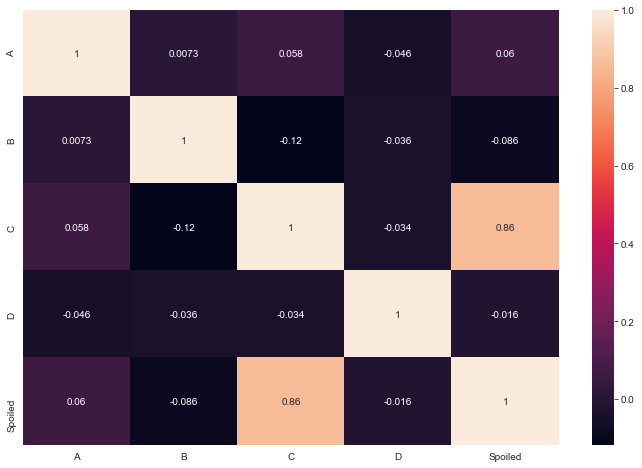

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(eda.corr(), annot=True)

## Spark

In [22]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('dog_food').getOrCreate()

In [23]:
df = spark.read.csv('../datasets/dog_food.csv', inferSchema=True, header=True)
df.printSchema()

root
 |-- A: integer (nullable = true)
 |-- B: integer (nullable = true)
 |-- C: double (nullable = true)
 |-- D: integer (nullable = true)
 |-- Spoiled: double (nullable = true)



In [24]:
df.show()

+---+---+----+---+-------+
|  A|  B|   C|  D|Spoiled|
+---+---+----+---+-------+
|  4|  2|12.0|  3|    1.0|
|  5|  6|12.0|  7|    1.0|
|  6|  2|13.0|  6|    1.0|
|  4|  2|12.0|  1|    1.0|
|  4|  2|12.0|  3|    1.0|
| 10|  3|13.0|  9|    1.0|
|  8|  5|14.0|  5|    1.0|
|  5|  8|12.0|  8|    1.0|
|  6|  5|12.0|  9|    1.0|
|  3|  3|12.0|  1|    1.0|
|  9|  8|11.0|  3|    1.0|
|  1| 10|12.0|  3|    1.0|
|  1|  5|13.0| 10|    1.0|
|  2| 10|12.0|  6|    1.0|
|  1| 10|11.0|  4|    1.0|
|  5|  3|12.0|  2|    1.0|
|  4|  9|11.0|  8|    1.0|
|  5|  1|11.0|  1|    1.0|
|  4|  9|12.0| 10|    1.0|
|  5|  8|10.0|  9|    1.0|
+---+---+----+---+-------+
only showing top 20 rows



**Split into `features` and `Spoiled`**

In [25]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['A', 'B', 'C', 'D'],
                            outputCol='features')

In [26]:
output = assembler.transform(df)

In [28]:
final_df = output.select('features', 'Spoiled')
final_df.show()

+-------------------+-------+
|           features|Spoiled|
+-------------------+-------+
| [4.0,2.0,12.0,3.0]|    1.0|
| [5.0,6.0,12.0,7.0]|    1.0|
| [6.0,2.0,13.0,6.0]|    1.0|
| [4.0,2.0,12.0,1.0]|    1.0|
| [4.0,2.0,12.0,3.0]|    1.0|
|[10.0,3.0,13.0,9.0]|    1.0|
| [8.0,5.0,14.0,5.0]|    1.0|
| [5.0,8.0,12.0,8.0]|    1.0|
| [6.0,5.0,12.0,9.0]|    1.0|
| [3.0,3.0,12.0,1.0]|    1.0|
| [9.0,8.0,11.0,3.0]|    1.0|
|[1.0,10.0,12.0,3.0]|    1.0|
|[1.0,5.0,13.0,10.0]|    1.0|
|[2.0,10.0,12.0,6.0]|    1.0|
|[1.0,10.0,11.0,4.0]|    1.0|
| [5.0,3.0,12.0,2.0]|    1.0|
| [4.0,9.0,11.0,8.0]|    1.0|
| [5.0,1.0,11.0,1.0]|    1.0|
|[4.0,9.0,12.0,10.0]|    1.0|
| [5.0,8.0,10.0,9.0]|    1.0|
+-------------------+-------+
only showing top 20 rows



In [29]:
train, test = final_df.randomSplit([0.7, 0.3])
train.count(), test.count()

(354, 136)

**Random forest classifier**

In [30]:
from pyspark.ml.classification import RandomForestClassifier
rfc = RandomForestClassifier(featuresCol='features', labelCol='Spoiled')

In [31]:
rfc_model = rfc.fit(train)

In [32]:
rfc_preds = rfc_model.transform(test)

**Evaluation**

In [33]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

In [46]:
auc_eval = BinaryClassificationEvaluator(labelCol='Spoiled')
print(f'Area Under the Curve: {auc_eval.evaluate(rfc_preds)}')

Area Under the Curve: 0.9765704154002025


In [44]:
acc_eval = MulticlassClassificationEvaluator(metricName='accuracy', labelCol='Spoiled')
recall_eval = MulticlassClassificationEvaluator(metricName='recallByLabel', labelCol='Spoiled')
precision_eval = MulticlassClassificationEvaluator(metricName='precisionByLabel', labelCol='Spoiled')
f1_eval = MulticlassClassificationEvaluator(metricName='f1', labelCol='Spoiled')

In [53]:
print(f'Accuracy: {acc_eval.evaluate(rfc_preds) :.4f}')
print(f'Recall: {recall_eval.evaluate(rfc_preds) :.4f}')
print(f'Precision: {precision_eval.evaluate(rfc_preds) :.4f}')
print(f'F1-Score: {f1_eval.evaluate(rfc_preds) :.4f}')

Accuracy: 0.9853
Recall: 1.0000
Precision: 0.9792
F1-Score: 0.9852


**Feature Importance**

In [54]:
rfc_model.featureImportances

SparseVector(4, {0: 0.0192, 1: 0.0301, 2: 0.9221, 3: 0.0286})

Index 2, which is Chemical `C` is the most important feature. And it was also  hypothesized when doing EDA.